In [1]:
# Importing dependencies
import pandas as pd
import datetime
from pandas import Series, DataFrame
## Note: Install pandas_datareader
## pip install pandas-datareader
import pandas_datareader.data as web
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style

In [50]:
## Loading Yahoo Finance data set form 2016
# Get start and end dates 
start_date = datetime.datetime(2016, 1, 1)
## Select today's date as end date
end_date = datetime.datetime.now().date().isoformat() 

stocks_df = web.DataReader('FB', 'yahoo', start_date, end_date)

# Displaying letest 5 records
stocks_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-27,193.750000,187.410004,192.660004,187.500000,29197800,187.500000
2020-04-28,189.199997,182.559998,188.660004,182.910004,21731000,182.910004
2020-04-29,196.910004,190.000000,190.929993,194.190002,45954500,194.190002
2020-04-30,209.690002,201.570007,206.919998,204.710007,46230100,204.710007
2020-05-01,207.279999,199.050003,201.600006,202.270004,30399600,202.270004


In [17]:
## Getting Final Closing price
closing_price_df= stocks_df['Adj Close']

closing_price_df.index = pd.to_datetime(closing_price_df.index)

closing_price_df.tail()

closing_price_df.head()

Symbols,FB
Date,
2016-01-04,102.220001
2016-01-05,102.730003
2016-01-06,102.970001
2016-01-07,97.919998
2016-01-08,97.330002


In [18]:
## Calculate 50 day Moving Average
ma_50day= closing_price_df.rolling(window=50).mean()

ma_50day.index = pd.to_datetime(ma_50day.index)

## Removing NULL Coulumns
ma_50day.dropna(inplace=True)
ma_50day.head()

ma_50day.head()

Symbols,FB
Date,
2016-03-15,103.8656
2016-03-16,104.0648
2016-03-17,104.2306
2016-03-18,104.4002
2016-03-21,104.6788


In [19]:
## Calculate 200 day Moving Average
ma_200day= closing_price_df.rolling(window=200).mean()

ma_200day.index = pd.to_datetime(ma_200day.index)

## Removing NULL Coulumns
ma_200day.dropna(inplace=True)
ma_200day.head()

ma_200day.head()

Symbols,FB
Date,
2016-10-17,115.85225
2016-10-18,115.98400
2016-10-19,116.12090
2016-10-20,116.25605
2016-10-21,116.42680


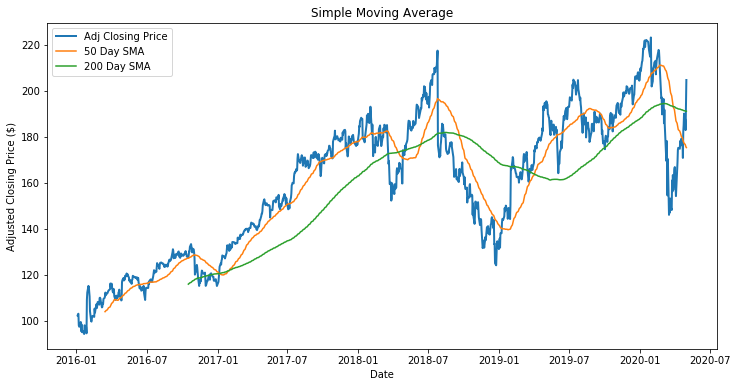

In [54]:
## Displaying Closing Price and Moving Average in Charts

#The size for our chart:
plt.figure(figsize = (12,6))
#Plotting price and SMA lines:
plt.plot(closing_price_df, label='Adj Closing Price', linewidth = 2)
plt.plot(ma_50day, label='50 Day SMA', linewidth = 1.5)
plt.plot(ma_200day, label='200 Day SMA', linewidth = 1.5)
#Adding title and labeles on the axes, making legend visible:
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price ($)')
plt.title('Simple Moving Average')
plt.legend()
plt.show()

In [55]:
## Analysing Multiple Stocks
tickers =['AMZN', 'GOOG', 'IBM', 'MSFT']
comp_stocks_df = web.DataReader(tickers,'yahoo',start_date,end_date)['Adj Close']

comp_stocks_df.head()

Symbols,AMZN,GOOG,IBM,MSFT
Date,,,,
2016-01-04,636.989990,741.840027,112.821960,50.398834
2016-01-05,633.789978,742.580017,112.738976,50.628761
2016-01-06,632.650024,743.619995,112.174667,49.709072
2016-01-07,607.940002,726.390015,110.257637,47.980057
2016-01-08,607.049988,714.469971,109.236893,48.127216
